# Fitting tool

It optimises the fit to the data points with the scipy.optimize.curve_fit function, which uses non-linear least squares to fit the function f to the data.

In [1]:
# First define the function to which the data should be fitted and import all the needed python functions.
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit

def f_cv(tau, factor, a, const):
    return factor*abs(tau)**(-a) + const
# in which tau = T-T_c

def f_m(tau, factor, beta, const):
    return factor*(-1*tau)**(beta) + const


def f_test(x, a, b, c):
    return a*np.exp(-b*x) + c

['temperature', 'magnetic_field', 'c_v', 'chi', 'magnetisation']


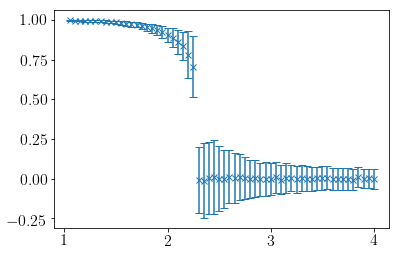

In [2]:
# Import the data from the simulation
data = np.load('./exported_data/saved_data_SW_1000.npz')
print(data.files)

xdata = data['temperature'].reshape(np.shape(data['temperature'])[0])
tot_data = data['magnetisation']
ydata = tot_data[:,0]
y_err = tot_data[:,1]

plt.rc('text', usetex=True)
plt.rc('font', family='serif')
plt.rc('font', size=16)

plt.errorbar(xdata, ydata, yerr=y_err, fmt='x', markersize=6, capsize=4)
plt.show()
#print(magnetisation_data.shape)

[ 2.25  2.2   2.15  2.1   2.05  2.  ]


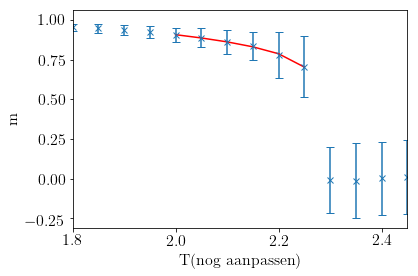

In [6]:
# %matplotlib notebook
# Apply the fit
#curve_fit(f, xdata, ydata, p0=None, sigma=None, absolute_sigma=False, check_finite=True, bounds=(-inf, inf), method=None, jac=None, **kwargs)
quantity = 'magnetisation'

T_c = 1/(1/2*np.arcsinh(1)) # This is actually 1/(beta_c*J) but as k_B = J = 1 by choice, this is the same

if quantity == 'magnetisation':
    indices = np.where((xdata>=2) & (xdata<T_c))  # De ondergrens nog ergens op baseren
    xdata_domain = xdata[indices]
    ydata_domain = ydata[indices]
    y_err_domain = y_err[indices]
    
    print(xdata_domain)
    
    xmax = xdata_domain[0] + 0.2
    xmin = xdata_domain[np.shape(xdata_domain)[0]-1] - 0.2
    
    xdata_domain = xdata_domain - T_c # in order to make it tau
    
    popt, pcov = curve_fit(f_m, xdata_domain, ydata_domain)
    plt.plot(xdata_domain + T_c, f_m(xdata_domain, *popt), 'r-')#, label = 'fit: a = %5.3f, b = %5.3f, c = %5.3f' % tuple(popt))
    plt.errorbar(xdata, ydata, yerr=y_err, fmt='x', markersize=6, capsize=4)

    plt.xlabel('T(nog aanpassen)')
    plt.ylabel('m')
    
     
    plt.xlim((xmin, xmax))
    #plt.legend()
    plt.show()
    
if quantity == 'c_v':
    indices = np.where((xdata>=-0.3) & (xdata<T_c+0.3))
    xdata_domain = xdata[indices]
    ydata_domain = ydata[indices]
    y_err_domain = y_err[indices]
    
    print(xdata_domain)
    
    xmax = xdata_domain[0] - 0.4
    xmin = xdata_domain[np.shape(xdata_domain)[0]-1] + 0.4
    
    xdata_domain = xdata_domain - T_c # in order to make it tau
    
    popt, pcov = curve_fit(f_m, xdata_domain, ydata_domain)
    plt.plot(xdata_domain + T_c, f_m(xdata_domain, *popt), 'r-')#, label = 'fit: a = %5.3f, b = %5.3f, c = %5.3f' % tuple(popt))
    plt.errorbar(xdata, ydata, yerr=y_err, fmt='x', markersize=6, capsize=4)

    plt.xlabel('T(nog aanpassen)')
    plt.ylabel('m')
    
     
    #plt.xlim((xmin, xmax))
    #plt.legend()
    plt.show()

<IPython.core.display.Javascript object>


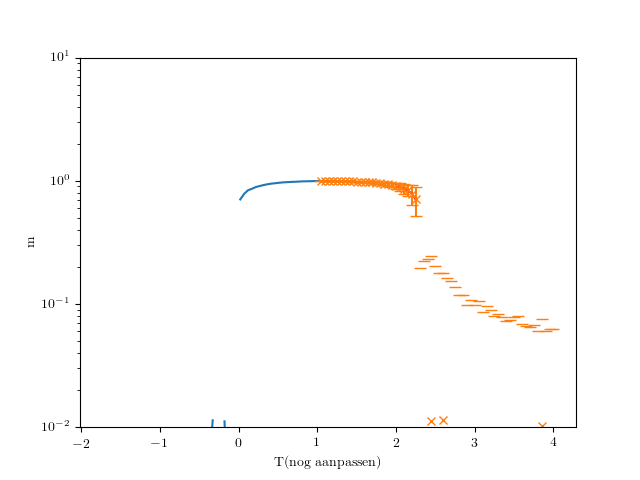

In [9]:
plt.figure()
plt.semilogy(T_c - xdata, ydata)
plt.ylim(ymax=10)
plt.ylim(ymin = 0.01)
plt.show()

In [10]:
popt

array([ 0.6108085 ,  0.22743482,  0.45640413])

In [10]:
print(popt)
print(xmin, xmax)

[ 0.6108085   0.22743482  0.45640413]
2.05 2.2


In [7]:
# Define test data (with noise)

xdata = np.linspace(0, 4, 50)
y = f_test(xdata, 2.5, 1.3, 0.5)
np.random.seed(1729)
y_noise = 0.2 * np.random.normal(size=xdata.size)
ydata = y + y_noise

plt.rc('text', usetex=True)
plt.rc('font', family='serif')
plt.rc('font', size=16)

plt.plot(xdata, ydata, 'b-', label='data')
#plt.show()

In [22]:
T_c = 1/(1/2*np.arcsinh(1))
print(T_c)

2.26918531421


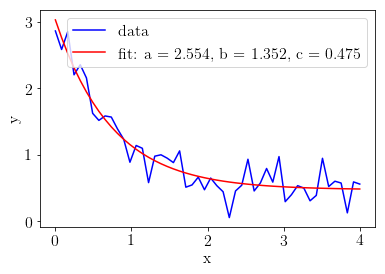

In [8]:
# Apply the fit
#curve_fit(f, xdata, ydata, p0=None, sigma=None, absolute_sigma=False, check_finite=True, bounds=(-inf, inf), method=None, jac=None, **kwargs)
popt, pcov = curve_fit(f_test, xdata, ydata)

plt.plot(xdata, f_test(xdata, *popt), 'r-', label = 'fit: a = %5.3f, b = %5.3f, c = %5.3f' % tuple(popt))
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.show()